In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Style for plots
sns.set_style("whitegrid")

# Load the dataset
try:
    df = pd.read_csv("Netflix Dataset.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'Netflix Dataset.csv' was not found.")

Dataset loaded successfully!


In [43]:
# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [44]:
# Get a summary of the dataframe, including data types and non-null values
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [45]:
# Handle missing values
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)

# Drop rows with missing 'Rating' or 'Duration'
df.dropna(subset=['Rating', 'Duration'], inplace=True)

# Convert 'Release_Date' to datetime objects after stripping whitespace
df['Release_Date'] = pd.to_datetime(df['Release_Date'].str.strip())
df['release_year'] = df['Release_Date'].dt.year

print("Data cleaning and preprocessing complete!")
print("\nChecking for remaining null values:")
print(df.isnull().sum())

Data cleaning and preprocessing complete!

Checking for remaining null values:
Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    10
Rating           0
Duration         0
Type             0
Description      0
release_year    10
dtype: int64


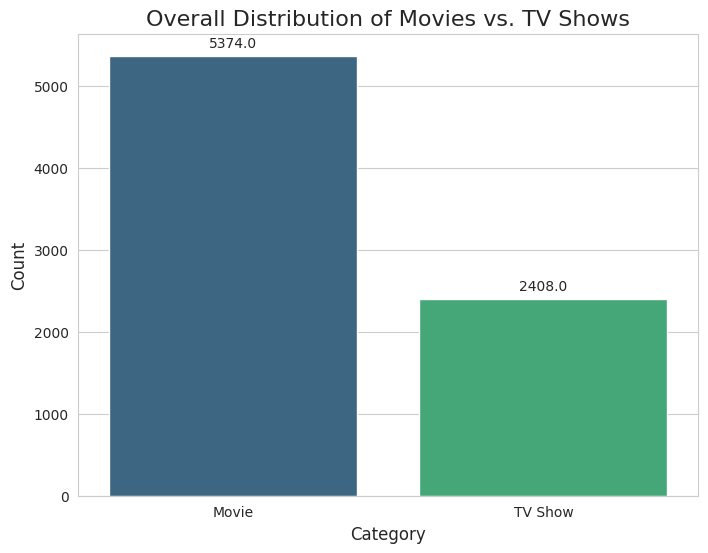

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Category', data=df, palette='viridis', order=df['Category'].value_counts().index)
plt.title('Overall Distribution of Movies vs. TV Shows', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

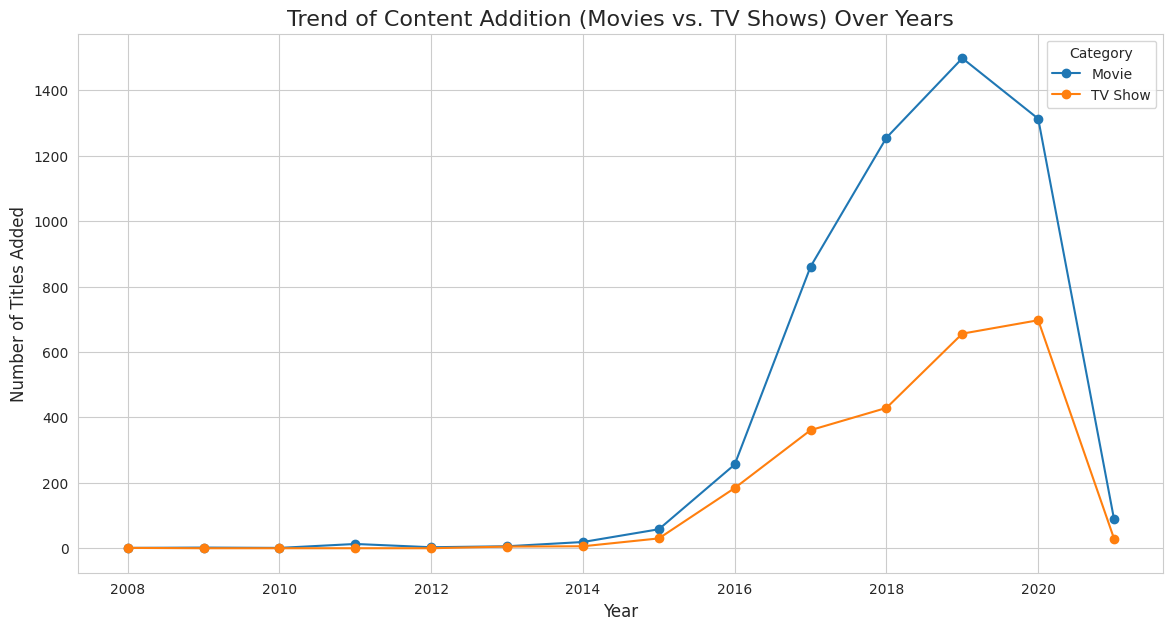

In [47]:
# Group by year and category to see the trend
yearly_content = df.groupby('release_year')['Category'].value_counts().unstack().fillna(0)

yearly_content.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Trend of Content Addition (Movies vs. TV Shows) Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Category')
plt.grid(True)
plt.show()

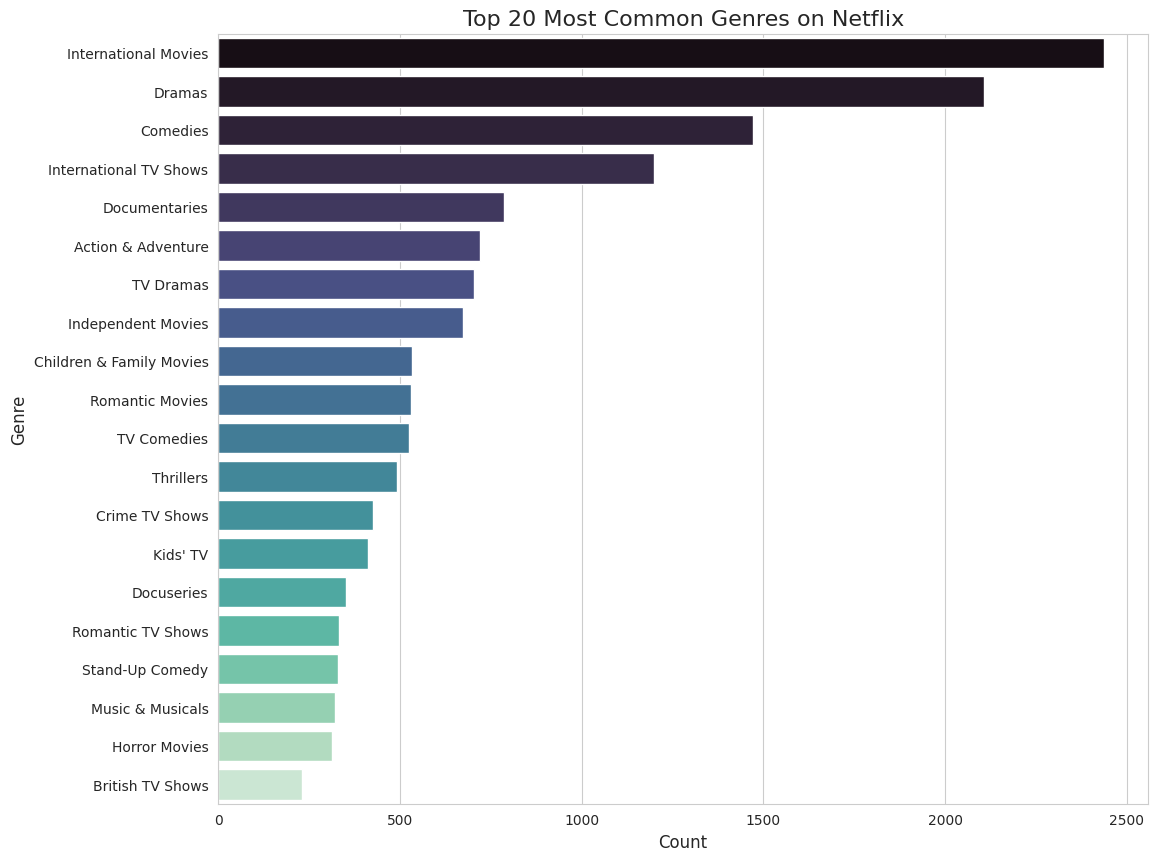

In [48]:
# The 'Type' column contains genres.
genres = df['Type'].str.split(', ').explode().reset_index(drop=True)

plt.figure(figsize=(12, 10))
# Plot using this 'genres' Series
sns.countplot(y=genres, order=genres.value_counts().index[:20], palette='mako')
plt.title('Top 20 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

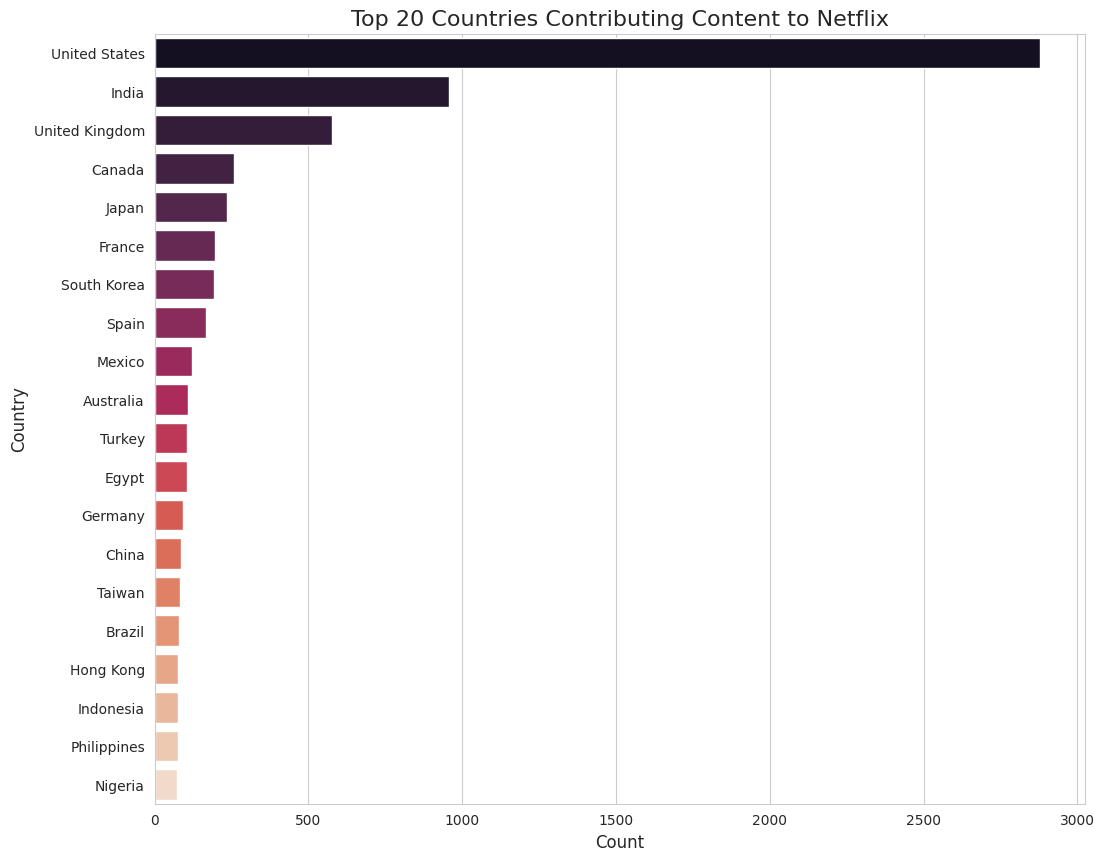

In [49]:
# First country listed as the primary country of production
primary_countries = df[df['Country'] != 'Unknown']['Country'].str.split(', ').str[0]

plt.figure(figsize=(12, 10))
sns.countplot(y=primary_countries, order=primary_countries.value_counts().index[:20], palette='rocket')
plt.title('Top 20 Countries Contributing Content to Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

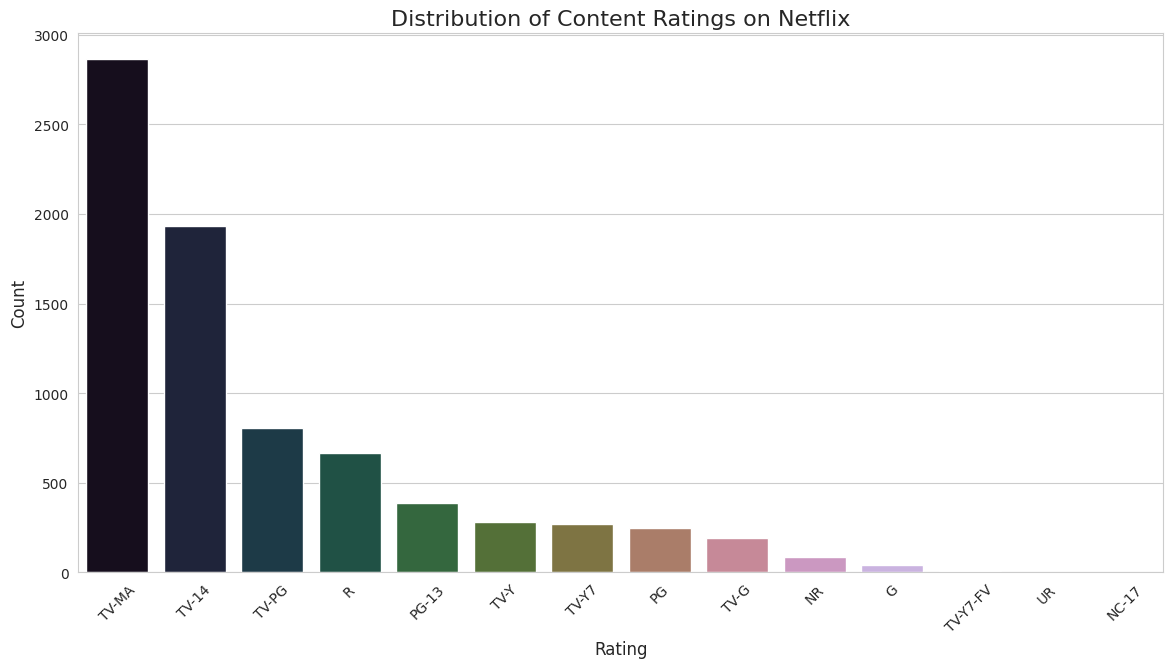

In [50]:
# Distribution of Content Ratings on Netflix
plt.figure(figsize=(14, 7))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

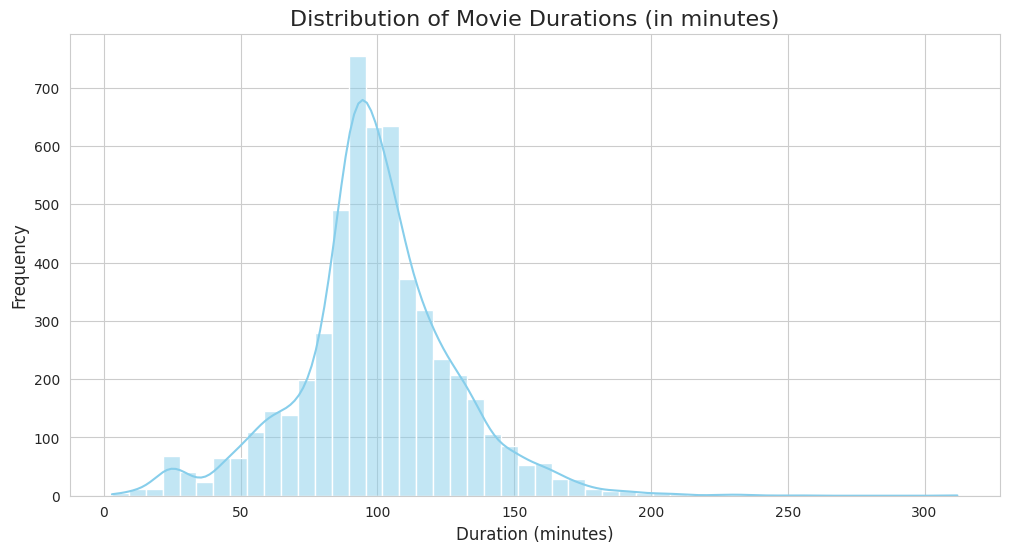

In [51]:
# Filter for movies and extract duration in minutes
movies_df = df[df['Category'] == 'Movie'].copy()
movies_df['duration_min'] = movies_df['Duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_min'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in minutes)', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

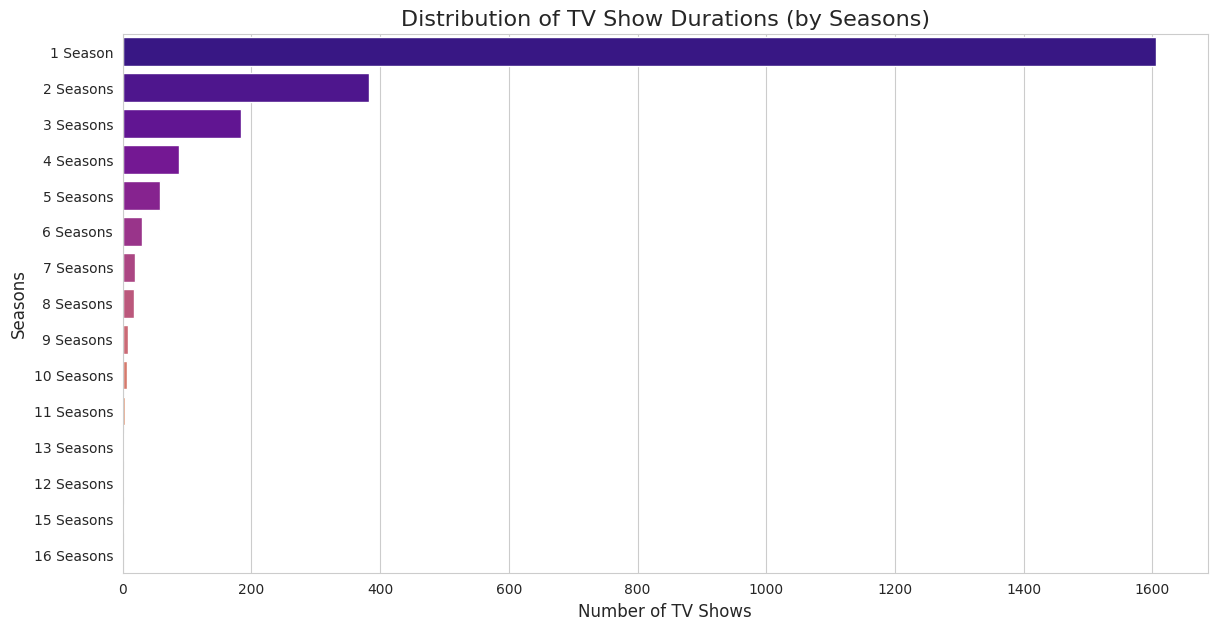

In [52]:
# Filter for TV shows
tv_shows_df = df[df['Category'] == 'TV Show'].copy()

plt.figure(figsize=(14, 7))
sns.countplot(y='Duration', data=tv_shows_df, order=tv_shows_df['Duration'].value_counts().index, palette='plasma')
plt.title('Distribution of TV Show Durations (by Seasons)', fontsize=16)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Seasons', fontsize=12)
plt.show()

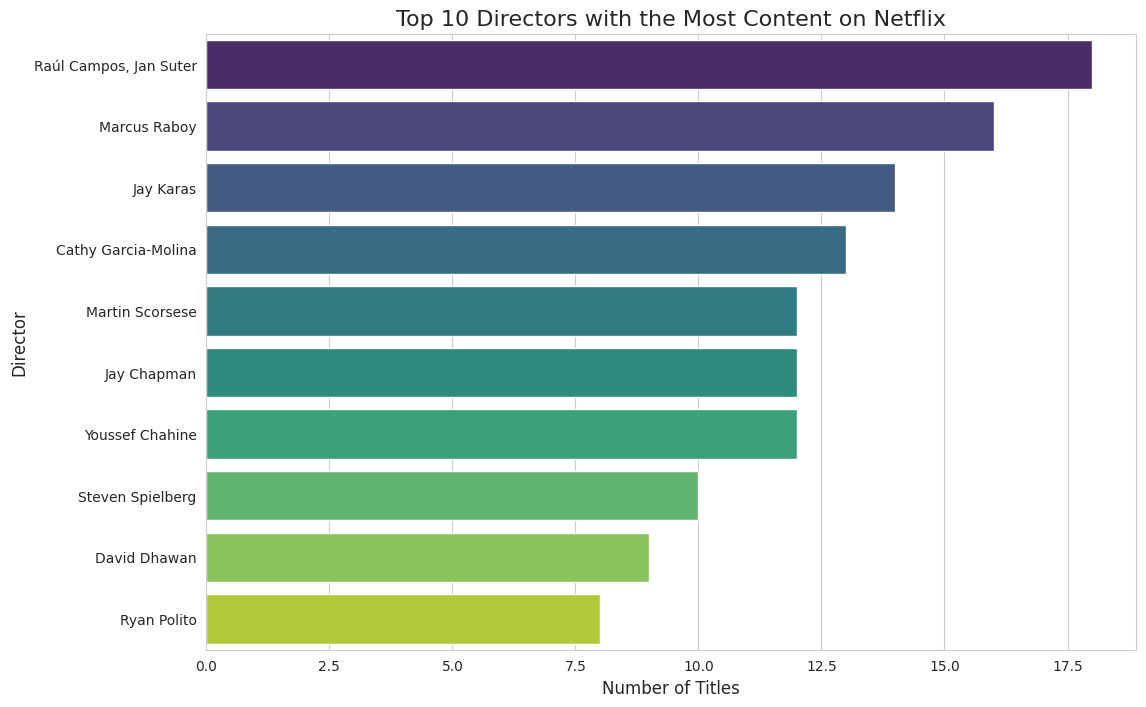

In [53]:
# Exclude 'Unknown' directors for this analysis
top_directors = df[df['Director'] != 'Unknown']['Director'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors with the Most Content on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()